In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
import seaborn as sns
df=sns.load_dataset("tips")
n_df=df[['total_bill',	'tip']]
n_df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


1안

In [3]:
X = n_df['total_bill']
y = n_df['tip']

In [4]:
X=X.values

In [5]:
X = X.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(X)
s_X = s.transform(X)
s_X

In [7]:
from sklearn.model_selection import train_test_split
tr_x, tt_x, tr_y, tt_y = train_test_split(X, y)
tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape

((183, 1), (183,), (61, 1), (61,))

2.안

In [8]:
X=n_df['total_bill']
y=n_df['tip']
tr_x,tt_x,tr_y,tt_y=train_test_split(X,y,random_state=1)
tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape

((183,), (183,), (61,), (61,))

In [9]:
tr_x=tr_x.values.reshape(-1,1)
tt_x=tt_x.values.reshape(-1,1)

In [10]:
tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape

((183, 1), (183,), (61, 1), (61,))

In [11]:
tr_s=MinMaxScaler().fit(tr_x)
s_tr_x=tr_s.transform(tr_x)
s_tt_x=tr_s.transform(tt_x)

In [12]:
s_tr_x.shape,tr_y.shape,s_tt_x.shape,tt_y.shape

((183, 1), (183,), (61, 1), (61,))

학습

In [13]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(s_tr_x,tr_y)

LinearRegression()

In [14]:
m.score(s_tr_x,tr_y)

0.4460328056458893

In [15]:
m.score(s_tt_x,tt_y)

0.4681058006407811

In [16]:
from sklearn.neighbors import KNeighborsRegressor
m1=KNeighborsRegressor()
m1.fit(s_tr_x,tr_y)
m1.score(s_tr_x,tr_y),m1.score(s_tt_x,tt_y)

(0.5276749819277526, 0.3802073893426069)

In [17]:
from sklearn.tree import DecisionTreeRegressor
m2=DecisionTreeRegressor()
m2.fit(s_tr_x,tr_y)
m2.score(s_tr_x,tr_y),m2.score(s_tt_x,tt_y)

(0.9579019740435393, 0.26309197350506464)

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
py=m2.predict(s_tt_x)
ty=tt_y
r2_score(ty,py),mean_absolute_error(ty,py),mean_squared_error(ty,py)

(0.26309197350506464, 1.0445901639344262, 1.8531147540983608)

In [19]:
df=pd.read_csv('data2.csv')
df.columns
X=df[['length',' height']]
y=df[' width']

FileNotFoundError: ignored

In [20]:
X,y

(0      16.99
 1      10.34
 2      21.01
 3      23.68
 4      24.59
        ...  
 239    29.03
 240    27.18
 241    22.67
 242    17.82
 243    18.78
 Name: total_bill, Length: 244, dtype: float64,
 0      1.01
 1      1.66
 2      3.50
 3      3.31
 4      3.61
        ... 
 239    5.92
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 244, dtype: float64)

Q1 수집된 데이터를 전처리 하시오

In [ ]:
X.shape,y.shape

((56, 2), (56,))

In [ ]:
tr_x,tt_x,tr_y,tt_y=train_test_split(X,y,random_state=1)
tr_x.shape,tt_x.shape,tr_y.shape,tt_y.shape

((42, 2), (14, 2), (42,), (14,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
tr_s=MinMaxScaler().fit(tr_x)
s_tr_x=tr_s.transform(tr_x)
s_tt_x=tr_s.transform(tt_x)
s_tr_x.shape,tr_y.shape,s_tt_x.shape,tt_y.shape

((42, 2), (42,), (14, 2), (14,))

학습

In [ ]:
tr_x_1=s_tr_x[:,:1]
tr_x_2=s_tr_x
tt_x_1=s_tt_x[:,:1]
tt_x_2=s_tt_x

In [ ]:
tr_x_1.shape,tr_x_2.shape,tr_y.shape

((42, 1), (42, 2), (42,))

In [ ]:
plt.scatter(tr_x_2[:,0],tr_y.values)
plt.show()
plt.scatter(tr_x_2[:,1],tr_y.values)
plt.show()

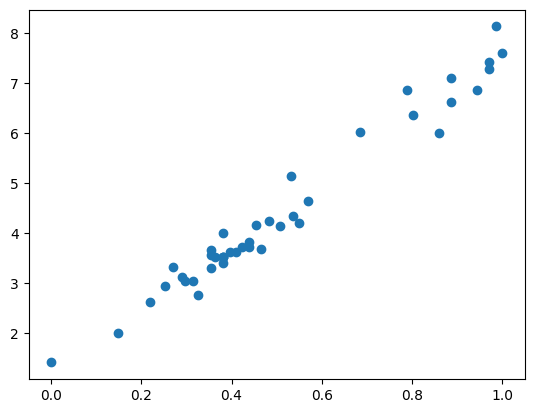

In [ ]:
plt.scatter(tr_x_1[:,0],tr_y.values)
plt.show()

In [ ]:
m=LinearRegression(,)
m.fit(tr_x_1,tr_y.values)

LinearRegression()

In [ ]:
m.score(tr_x_1,tr_y.values),m.score(tt_x_1,tt_y.values)

(0.9674832553034299, 0.8550117686605199)

In [ ]:
m=LinearRegression()
m.fit(tr_x_2,tr_y.values)

LinearRegression()

In [ ]:
m.score(tr_x_2,tr_y.values),m.score(tt_x_2,tt_y.values)

(0.9719231546873426, 0.9099929008210612)

In [ ]:
W=m.coef_,b=m.intercept_
#y=Wx+b
y=W[0]*s_tr_x[:,0]+W[1]*s_tr_x[:,1]+b

(array([3.54374658, 2.8598337 ]), 1.1896947559377988)

In [ ]:
def h(X):
  W=[3.54374658,2.8598337]
  b=1.1896947559377988
  return W[0]*X[0]+W[1]+X[1]+b

In [ ]:
in_x=tt_x_2[0]

In [ ]:
py=h(in_x)
py

7.940272506268675

In [ ]:
ty=tt_y.values[0]
ty

7.49

In [ ]:
s_tr_y=tr_y.values
s_tt_y=tt_y.values

In [ ]:
tr_x_1.shape,s_tr_y.shape,tt_x_1.shape,s_tt_y.shape

((42, 1), (42,), (14, 1), (14,))